# Mounting gdrive, and setting the paths of train data and labels, and test data

In [47]:
from google.colab import drive
drive.mount('/content/gdrive' )

training_set_pickle_path = "/content/gdrive/MyDrive/ecse551-mp3/Train.pkl"
training_labels_path = "/content/gdrive/MyDrive/ecse551-mp3/Train_labels.csv"
test_set_pickle_path = "/content/gdrive/MyDrive/ecse551-mp3/Test.pkl"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
import torch
from sklearn.model_selection import train_test_split

import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# tuning learning rate
%pip install skorch
from skorch.callbacks import LRScheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn


Note: you may need to restart the kernel to use updated packages.


# Check GPU

In [3]:
# Check device
USE_CUDA = 0
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(DEVICE)
data = data.to(DEVICE)

print(torch.cuda.is_available())
if torch.cuda.is_available():
    USE_CUDA = 1
    print(f"Nvidia Cuda/GPU is available!")

if USE_CUDA:
    print(torch.cuda.get_device_name(0))
    print(torch.cuda.memory_allocated(0))
    print(torch.cuda.memory_cached(0))
else:
    print("Running on CPU")


NameError: name 'model' is not defined

# Read a pickle file and display its samples

(60000, 1, 28, 28)
7.0


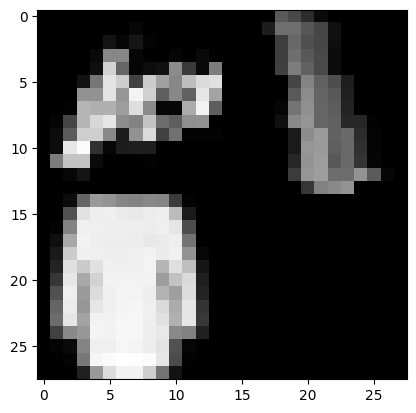

In [72]:
data = pickle.load( open(training_set_pickle_path, 'rb' ), encoding='bytes')
targets = np.genfromtxt(training_labels_path, delimiter=',', skip_header=1)[:,1]
plt.imshow(data[1,:,:].squeeze(),cmap='gray') # display the first image, 
print(data.shape)
print(targets[1])

# #**Reading the data**

*img_transform, 
Class MyDataset, 
Class TestDataset*

Transforms are common image transformations. They can be chained together using Compose.
Here we normalize images img=(img-0.5)/0.5

In [51]:
# Transforms are common image transformations. They can be chained together using Compose.
# Here we normalize images img=(img-0.5)/0.5
img_transform = transforms.Compose([
    transforms.ToTensor(), #convert the image to a pytorch tensor
    transforms.Normalize([0.5], [0.5]) ## normalize the image
])

In [52]:
class MyDataset(Dataset): # preprocessing the data
    def __init__(self, img_file, label_file, transform=None, idx = None): # idx is a binary vector #img_file is the pickle file #label_file is the csv file
        self.data = pickle.load(open (img_file, 'rb'), encoding='bytes') # encoding='bytes' is for python 3, 
        
        self.targets = np.genfromtxt(label_file, delimiter=',', skip_header=1)[:,1]
        if idx is not None:
          self.targets = self.targets[idx]
          self.data = self.data[idx]
        self.transform = transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        img, target = self.data[index], int(self.targets[index])
        img = Image.fromarray(img.squeeze().astype('uint8'), mode='L')

        if self.transform is not None:
           img = self.transform(img) # apply the transformation to the image (normalize)
            
        return img, target


In [53]:
class MyTestSet(Dataset):

  # constructor 
  def __init__(self, img_file, transform=None):
    self.data = pickle.load( open(img_file, 'rb' ), encoding='bytes')
    self.transform = transform

  # returns the size of our data set
  def __len__(self):
    return self.data.shape[0]

  # returns a specific image in the data set by index
  def __getitem__(self, index):
    img = self.data[index]
    img = Image.fromarray(img.astype('uint8'), mode='L')
    if self.transform is not None:
      img = self.transform(img)
    return img
     

# Load data, using the classes above

In [54]:
'''
# Read image data and their label into a Dataset class
# Random split by training =0.8 and validation = 0.2

idx_train, idx_val = train_test_split(np.arange(60000) , test_size=0.2, random_state=42)

# Read data from pkl and label in csv
data_train = MyDataset(training_set_pickle_path, training_labels_path,transform=img_transform, idx=idx_train)

data_val = MyDataset(training_set_pickle_path, training_labels_path,transform=img_transform, idx=idx_val)     

# Read Test data
test_final = MyTestSet(test_set_pickle_path,transform=img_transform)


#Load data twice for training and validation ?
train_loader = DataLoader(data_train, batch_size=batch_size_train, shuffle=True)

val_loader = DataLoader(data_val,batch_size=batch_size_train, shuffle=True)

test_loader = DataLoader(test_final, batch_size=batch_size_test, shuffle=False)
'''

'\n# Read image data and their label into a Dataset class\n# Random split by training =0.8 and validation = 0.2\n\nidx_train, idx_val = train_test_split(np.arange(60000) , test_size=0.2, random_state=42)\n\n# Read data from pkl and label in csv\ndata_train = MyDataset(training_set_pickle_path, training_labels_path,transform=img_transform, idx=idx_train)\n\ndata_val = MyDataset(training_set_pickle_path, training_labels_path,transform=img_transform, idx=idx_val)     \n\n# Read Test data\ntest_final = MyTestSet(test_set_pickle_path,transform=img_transform)\n\n\n#Load data twice for training and validation ?\ntrain_loader = DataLoader(data_train, batch_size=batch_size_train, shuffle=True)\n\nval_loader = DataLoader(data_val,batch_size=batch_size_train, shuffle=True)\n\ntest_loader = DataLoader(test_final, batch_size=batch_size_test, shuffle=False)\n'

Another way to upload data ! from tutorial

CHECK -> Loading the data correctly? with normalization

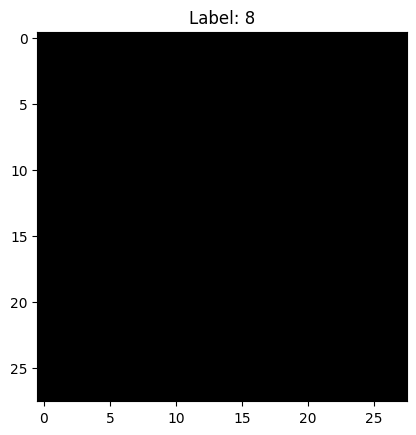

In [55]:
# Using the existing MyDataset class
dataset = MyDataset(training_set_pickle_path, training_labels_path, transform=img_transform)

# Retrieve the first example (image and label)
example_image, example_label = dataset[0]

# Convert the image back to its original range (undo the normalization)
example_image = (example_image * 0.5) + 0.5
example_image = example_image.squeeze().numpy()

# Plot the image and display the label
plt.imshow(example_image, cmap='gray')
plt.title(f'Label: {example_label}')
plt.show()

CHECK -> Loading the data correctly? without normalization

# Using DataLoader, that was imported earlier

using a code from [link text](https://nextjournal.com/gkoehler/pytorch-mnist)

In [56]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 2e-3
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

**CNN**

In [57]:
class Net(nn.Module): ############ this is the model we are going to use
    # This part defines the layers
    def __init__(self):
        super(Net, self).__init__()
        # At first there is only 1 channel (greyscale). The next channel size will be 10. 

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) ################################# if we have RGB images, we should use 3 instead of 1 !!!

        # Then, going from channel size (or feature size) 10 to 20. 
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # Now let us create some feed foreward layers in the end. Remember the sizes (from 320 to 50)
        self.fc1 = nn.Linear(320, 50) ############### we want to use a fully connected layer
        # The last layer should have an output with the same dimension as the number of classes
        self.fc2 = nn.Linear(50, 10) ################ we want to use a fully connected layer

    # And this part defines the way they are connected to each other
    # (In reality, it is our foreward pass)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


Stochastic Gradient Decent optimizer

In [58]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5) # momentum is a technique to accelerate the gradient descent

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(3)] 

**Training & Test functions**

In [59]:
def train(epoch): # this function is used to train the model in each epoch, we can use it in the next cell
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target) #negative log liklhood loss
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/model.pth')
      torch.save(optimizer.state_dict(), '/optimizer.pth')

def test():
  network.eval() # this is used to tell the model that we are in the test phase, we dont want to update the weights
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in val_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum() # this is used to calculate the accuracy, we compare the predicted label with the ground truth label
  test_loss /= len(val_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(val_loader.dataset),
    100. * correct / len(val_loader.dataset)))

In [60]:
for epoch in range(1, 4):
  train(epoch) # we can use the train function we defined above
  test() # we can use the test function we defined above

Train Epoch: 1 [0/48000 (0%)]	Loss: 2.301224
Train Epoch: 1 [1280/48000 (3%)]	Loss: 2.306891
Train Epoch: 1 [2560/48000 (5%)]	Loss: 2.306208
Train Epoch: 1 [3840/48000 (8%)]	Loss: 2.316007
Train Epoch: 1 [5120/48000 (11%)]	Loss: 2.298058
Train Epoch: 1 [6400/48000 (13%)]	Loss: 2.296128
Train Epoch: 1 [7680/48000 (16%)]	Loss: 2.303270
Train Epoch: 1 [8960/48000 (19%)]	Loss: 2.308464
Train Epoch: 1 [10240/48000 (21%)]	Loss: 2.308393
Train Epoch: 1 [11520/48000 (24%)]	Loss: 2.301598
Train Epoch: 1 [12800/48000 (27%)]	Loss: 2.307207
Train Epoch: 1 [14080/48000 (29%)]	Loss: 2.316644
Train Epoch: 1 [15360/48000 (32%)]	Loss: 2.317132
Train Epoch: 1 [16640/48000 (35%)]	Loss: 2.293702
Train Epoch: 1 [17920/48000 (37%)]	Loss: 2.305942
Train Epoch: 1 [19200/48000 (40%)]	Loss: 2.308614
Train Epoch: 1 [20480/48000 (43%)]	Loss: 2.300253
Train Epoch: 1 [21760/48000 (45%)]	Loss: 2.305111
Train Epoch: 1 [23040/48000 (48%)]	Loss: 2.301165
Train Epoch: 1 [24320/48000 (51%)]	Loss: 2.304727
Train Epoch: 1 

/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3029, Accuracy: 1155/12000 (10%)

Train Epoch: 2 [0/48000 (0%)]	Loss: 2.303169
Train Epoch: 2 [1280/48000 (3%)]	Loss: 2.301094
Train Epoch: 2 [2560/48000 (5%)]	Loss: 2.301756
Train Epoch: 2 [3840/48000 (8%)]	Loss: 2.303795
Train Epoch: 2 [5120/48000 (11%)]	Loss: 2.300735
Train Epoch: 2 [6400/48000 (13%)]	Loss: 2.302333
Train Epoch: 2 [7680/48000 (16%)]	Loss: 2.302888
Train Epoch: 2 [8960/48000 (19%)]	Loss: 2.302040
Train Epoch: 2 [10240/48000 (21%)]	Loss: 2.302561
Train Epoch: 2 [11520/48000 (24%)]	Loss: 2.304782
Train Epoch: 2 [12800/48000 (27%)]	Loss: 2.303570
Train Epoch: 2 [14080/48000 (29%)]	Loss: 2.302713
Train Epoch: 2 [15360/48000 (32%)]	Loss: 2.302062
Train Epoch: 2 [16640/48000 (35%)]	Loss: 2.302934
Train Epoch: 2 [17920/48000 (37%)]	Loss: 2.302805
Train Epoch: 2 [19200/48000 (40%)]	Loss: 2.302782
Train Epoch: 2 [20480/48000 (43%)]	Loss: 2.301021
Train Epoch: 2 [21760/48000 (45%)]	Loss: 2.302954
Train Epoch: 2 [23040/48000 (48%)]	Loss: 2.300700
Train E

**Loss Graph**

Text(0, 0.5, 'negative log likelihood loss')

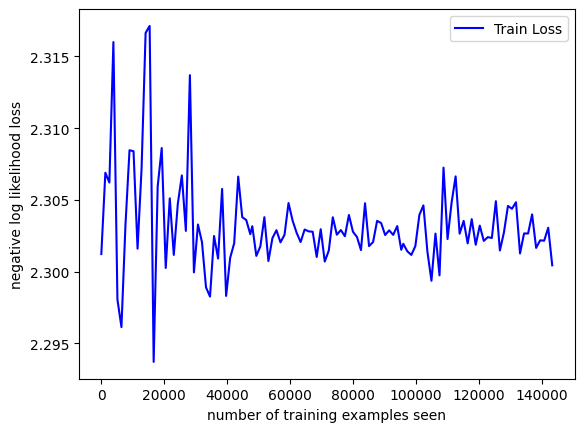

In [61]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue') # the loss of the training set, decreasing 
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
# fig

TRY #2

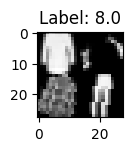

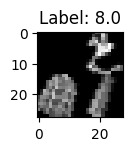

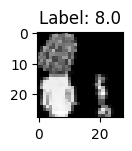

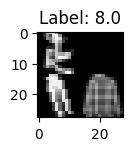

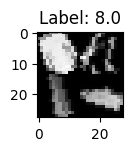

In [68]:
from torch.utils.data import random_split

# Read image data and their label into a Dataset 
data = pickle.load( open(training_set_pickle_path, 'rb' ))
targets = np.genfromtxt(training_labels_path, delimiter=',', skip_header=1)[:,1]

data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

dataset = TensorDataset(data,targets)

batch_size = 256 #feel free to change it
dataloader = DataLoader(dataset,batch_size=batch_size, shuffle=True)
'''
############ READ FIRST PICTURE ###################
# Read a batch of data and their labels and display them

[imgs, labels] = (next(iter(dataloader)))
imgs = np.squeeze(imgs)
plt.imshow(imgs[12].cpu().numpy(),cmap='gray',interpolation="bicubic") #.transpose()

# Here is a piece of code that reads data in batch.
# In each epoch all samples are read in batches using dataloader

# Retrieve the first example (image and label)
example_image, example_label = dataset[0]

# Convert the image back to its original range (undo the normalization)
example_image = (example_image * 0.5) + 0.5
example_image = example_image.squeeze().numpy()

# Plot the image and display the label
plt.imshow(example_image, cmap='gray')
plt.title(f'Label: {example_label}')
plt.show()
'''
'''
# Read a batch of data and their labels and display them
[imgs, labels] = (next(iter(dataloader)))
imgs = np.squeeze(imgs)

# Display two images and their titles
num_images_to_display = 5

for i in range(num_images_to_display):
    img = imgs[i].cpu().numpy()
    label = labels[i].item()

    # Convert the image back to its original range (undo the normalization)
    img = (img * 0.5) + 0.5

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {example_label}')
    plt.show()
'''

In [65]:
# Define the split ratio, e.g., 80% for training and 20% for validation
train_ratio = 0.8
validation_ratio = 1 - train_ratio

# Calculate the number of samples for each set
total_samples = len(dataset)
train_samples = int(train_ratio * total_samples)
validation_samples = total_samples - train_samples

# Split the dataset into training and validation sets
train_dataset, validation_dataset = random_split(dataset, [train_samples, validation_samples])

# Create DataLoaders for training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

# Process the data using the DataLoader
num_epochs = 2
for epoch in range(num_epochs):
    # Training loop
    for data in train_dataloader:
        imgs, labels = data
        # Add your training code here
        # Forward pass
        outputs = network(data)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation loop
    with torch.no_grad():
        for data in validation_dataloader:
            imgs, labels = data
            # Add your validation code here
            # Forward pass
            outputs = network(data)
            loss = criterion(outputs, labels)
            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print statistics
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, loss.item(), 100 * correct / total))


TypeError: ignored